In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [4]:
list(mnist)

['data',
 'target',
 'frame',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'categories',
 'url']

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
mnist.target.shape

(70000,)

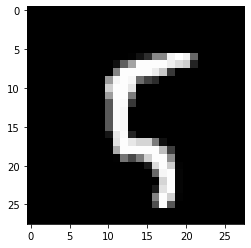

In [7]:
plt.imshow(mnist.data[100].reshape(28,28),cmap='gray')

In [8]:
images = (0.99 * mnist.data)/ 255

In [9]:
print(np.max(images[0]),np.min(images[0]))

0.99 0.0


In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [11]:
num = mnist.target.shape[0]
print(num)

70000


In [12]:
# one-hot encode the y_true values
y_true = np.zeros((num,10))
for i in range(num):
    y_true[i,int(mnist.target[i])] = 1

In [13]:
X_train,X_test,y_train,y_test = \
train_test_split(mnist.data,
                 y_true,
                 test_size = 0.8, 
                 random_state = 42)
size = X_train.shape[0]
print(size)
#for i in range(size):
#    print(np.argmax(y_train[i]))

14000


In [14]:
X_valid,y_valid = X_test[:14000],y_test[:14000]
X_test_final,y_test_final = X_test[14000:],y_test[14000:]

In [15]:
print(X_valid.shape)
print(X_test_final.shape)
test_size = X_test_final.shape[0]

(14000, 784)
(42000, 784)


In [ ]:
input_layer = 784
hidden_layer = 64
output_layer = 10

w1 = np.random.normal(0,
                      1/np.sqrt(input_layer),
                      size = (hidden_layer,input_layer))

w2 = np.random.normal(0,
                      1/np.sqrt(hidden_layer),
                      size = (output_layer,hidden_layer))

b1 = np.ones((hidden_layer,1))

b2 = np.ones((output_layer,1))

lr = .001
epochs = [x for x in range(20)]
train_error = []
valid_error = []
Error = 0
for epoch in epochs:
    error = 0
    cnt = 0
    cnt_v = 0
    error_v = 0
    for i in range(size):
        # get the true value
        t  = y_train[i].reshape(output_layer,1)
        tV = y_valid[i].reshape(output_layer,1)
        # set nodes
        x0 = X_train[i].reshape(input_layer,1)
        x1 = sigmoid(w1.dot(x0)+b1)
        x2 = sigmoid(w2.dot(x1)+b2)
        # calculate errors
        error += np.sum( -t * np.log(x2)-(1-t) * np.log(1-x2))/size
        derr = (x2-t)/(x2 * (1-x2))
        
        x_valid_0 = X_valid[i].reshape(input_layer,1)
        x_valid_1 = sigmoid(w1.dot(x_valid_0)+b1)
        x_valid_2 = sigmoid(w2.dot(x_valid_1)+b2)
        error_v += np.sum( -tV * np.log(x_valid_2)-(1-tV) * np.log(1-x_valid_2))/size
        #error_v += np.sum((x_valid_2 - tV)**2)
        
        
        #calculate deltas
        delta_layer2 = (derr * (x2 * (1-x2)))        
        delta_layer1 = (((w2.T).dot(delta_layer2)) * (x1 * (1-x1)))
        
        #clean up notation
        w2 = w2 - lr * delta_layer2.dot(x1.T)
        b2 = b2 - lr * delta_layer2
        w1 = w1 - lr * delta_layer1.dot(x0.T)
        b1 = b1 - lr * delta_layer1
        #calculate how many are correct, for accuracy
        
        cnt_v += np.argmax(x_valid_2) == np.argmax(tV)
        cnt += np.argmax(x2) == np.argmax(t)
    train_error.append(error)
    valid_error.append(error_v)
    if epoch%1 == 0:
        print(f'Epoch {epoch}')
        print(f'Error is {error:.2f}; Accuracy is {100*cnt/size:.2f}%')
        print(f'Validation error is {error_v:.2f} and validation accuracy is {100*cnt_v/size:.2f}%')
        print("---------------------------------------------")
print(f'Final training accuracy is {100*cnt/size:.2f}%')

/Users/christiansutton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch 0
Error is 2.33; Accuracy is 64.88%
Validation error is 2.33 and validation accuracy is 64.57%
---------------------------------------------
Epoch 1
Error is 1.53; Accuracy is 79.89%
Validation error is 1.53 and validation accuracy is 79.12%
---------------------------------------------
Epoch 2
Error is 1.33; Accuracy is 81.73%
Validation error is 1.34 and validation accuracy is 81.60%
---------------------------------------------
Epoch 3
Error is 1.23; Accuracy is 82.56%
Validation error is 1.25 and validation accuracy is 82.57%
---------------------------------------------
Epoch 4
Error is 1.20; Accuracy is 82.41%
Validation error is 1.22 and validation accuracy is 82.02%
---------------------------------------------


In [20]:
cnt = 0
print(f'Number of test samples is: {test_size}')
for i in range(test_size):
    t = y_test_final[i].reshape(output_layer,1)
    # set nodes
    x0 = X_test_final[i].reshape(input_layer,1)
    x1 = sigmoid(w1.dot(x0)+b1)
    x2 = sigmoid(w2.dot(x1)+b2)
    cnt += np.argmax(x2) == np.argmax(t)
print(f'Testing accuracy is {100 * cnt/(test_size):.2f}%')

Number of test samples is: 42000


/Users/christiansutton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Testing accuracy is 87.53%


In [ ]:
print('Please input a digit:')
i = int(input())
blind = X_test_final[i].reshape(28,28)                                 
plt.imshow(blind,cmap='gray')
x0 = X_test_final[i].reshape(input_layer,1)
x1 = sigmoid(w1.dot(x0)+b1)
x2 = sigmoid(w2.dot(x1)+b2)
print(f'The queried digit is {np.argmax(x2)}.  The correct digit is {np.argmax(y_test_final[i])}')

Please input a digit:


In [ ]:
plt.imshow(w2,cmap='gray')

In [ ]:
plt.imshow(w1,aspect=10,cmap='gray')